# Assignment 4 

## Step 1

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import os
keras = tf.keras
# Get data
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures




In [2]:
# Get info about our data
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


## Step 2 - Design and train CNN. Show train & validation accuracy curve for each epoch.

### Apply multiple data augmentation techniques with ImageDataGenerator to reduce overfitting

In [3]:
# Hyper params
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Define image generator that rescales data to 1
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

# Apply image generator to training and validation directories
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Visualization

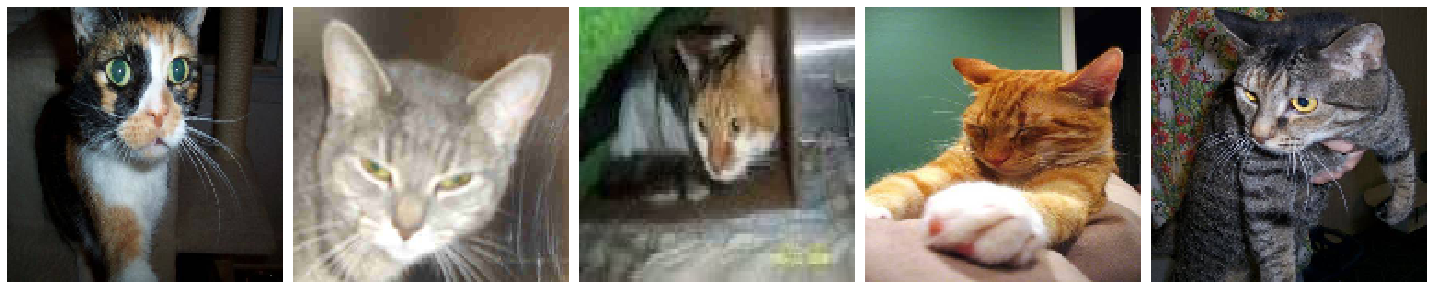

In [4]:
# Visualize training images
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(sample_training_images[:5])

### Define keras CNN model

In [5]:
# It's sequential with 3 Convolutional layers and two dense layers.
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Complile model 
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# View all of the layers of the network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

### Train Model

In [6]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
15/15 [==============================] - 5s 301ms/step - loss: 0.8975 - accuracy: 0.5059 - val_loss: 0.6881 - val_accuracy: 0.5357
Epoch 2/15
15/15 [==============================] - 4s 271ms/step - loss: 0.6763 - accuracy: 0.5791 - val_loss: 0.6611 - val_accuracy: 0.5915
Epoch 3/15
15/15 [==============================] - 4s 267ms/step - loss: 0.6236 - accuracy: 0.6651 - val_loss: 0.6741 - val_accuracy: 0.5971
Epoch 4/15
15/15 [==============================] - 4s 254ms/step - loss: 0.6048 - accuracy: 0.6579 - val_loss: 0.6417 - val_accuracy: 0.6161
Epoch 5/15
15/15 [==============================] - 4s 246ms/step - loss: 0.5631 - accuracy: 0.7302 - val_loss: 0.5858 - val_accuracy: 0.7031
Epoch 6/15
15/15 [==============================] - 4s 245ms/step - loss: 0.5024 - accuracy: 0.7553 - val_loss: 0.6118 - val_accuracy: 0.6786
Epoch 7/15
15/15 [==============================] - 4s 236ms/step - loss: 0.4707 - accuracy: 0.7859 - val_loss: 0.6048 - val_accuracy: 0.7042
Epoch 

### Visualize training results

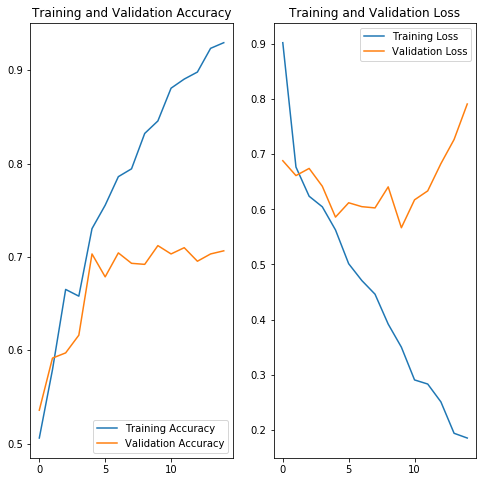

In [7]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Perform data augmentation for better results

Found 2000 images belonging to 2 classes.


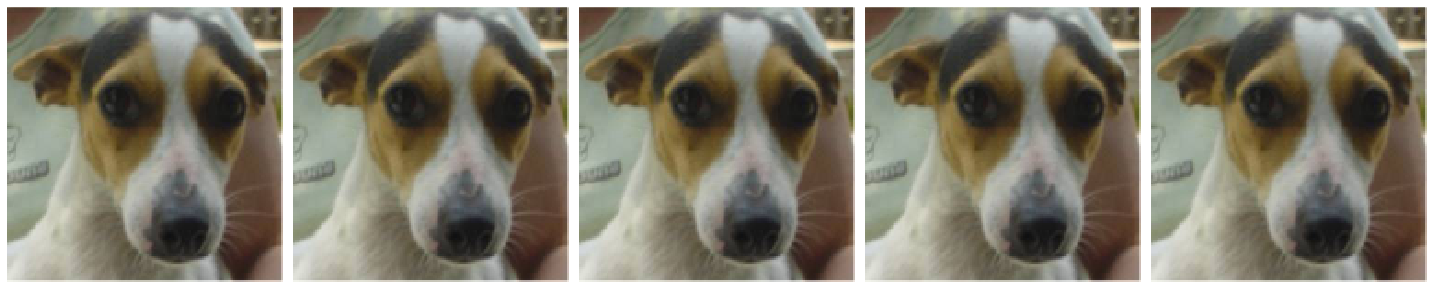

In [8]:
# Horizontal flip

image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)


Found 2000 images belonging to 2 classes.


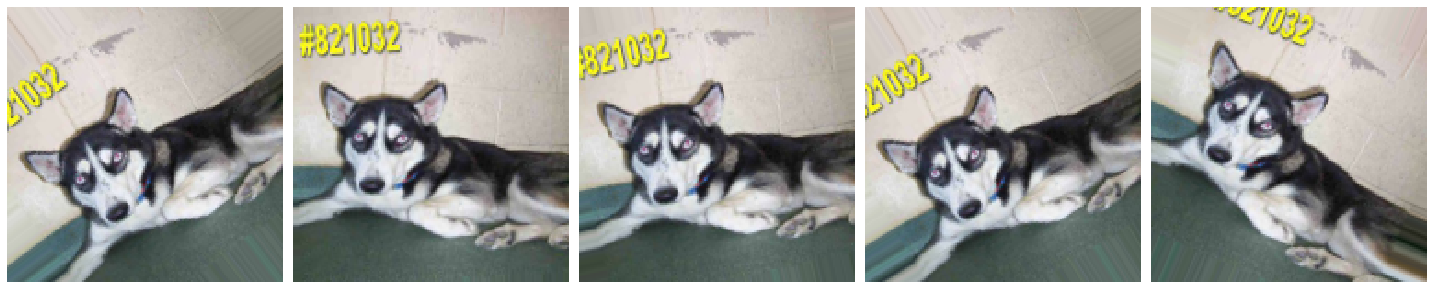

In [9]:
# Image rotation
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


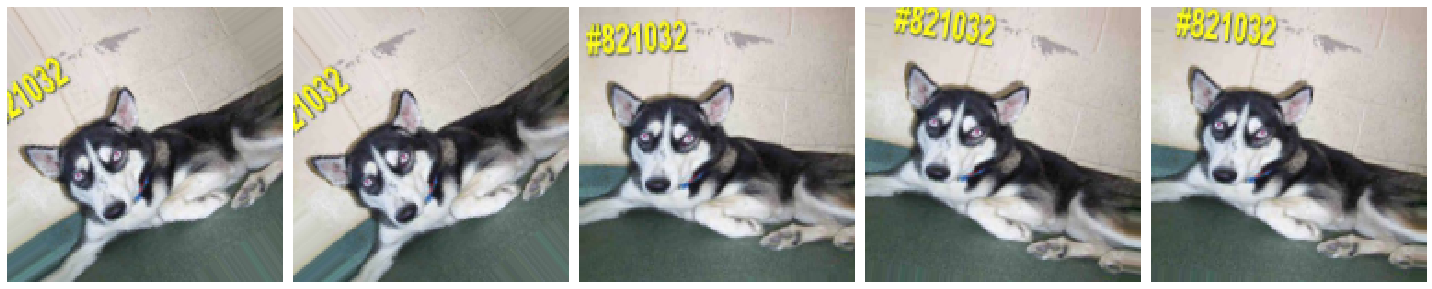

In [10]:
# Zoom augmentation
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

traing_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)



### Put together all data augmentation techniques

Found 2000 images belonging to 2 classes.


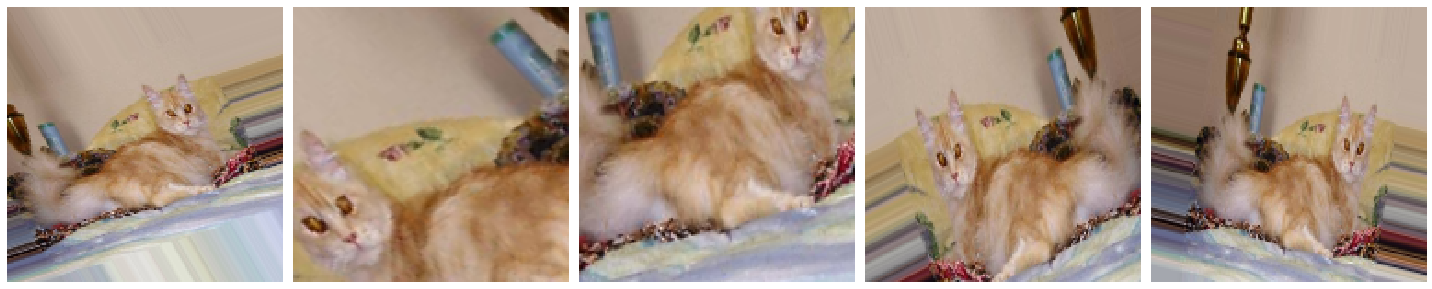

In [11]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
# Scale validation images down
image_gen_val = ImageDataGenerator(rescale=1./255)

# No augmentation, only applied to training examples. Still to scale them though.
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


### Add dropout to the network

In [13]:
# Define model
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show summary of networks layers and nodes
model_new.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)       

### Train model

In [14]:
history = model_new.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/15
15/15 [==============================] - 8s 558ms/step - loss: 0.8885 - accuracy: 0.4984 - val_loss: 0.6932 - val_accuracy: 0.5056
Epoch 2/15
15/15 [==============================] - 8s 525ms/step - loss: 0.6932 - accuracy: 0.4989 - val_loss: 0.6927 - val_accuracy: 0.5201
Epoch 3/15
15/15 [==============================] - 8s 508ms/step - loss: 0.6926 - accuracy: 0.5240 - val_loss: 0.6902 - val_accuracy: 0.5100
Epoch 4/15
15/15 [==============================] - 7s 481ms/step - loss: 0.6895 - accuracy: 0.5342 - val_loss: 0.6768 - val_accuracy: 0.5246
Epoch 5/15
15/15 [==============================] - 7s 466ms/step - loss: 0.6808 - accuracy: 0.5844 - val_loss: 0.6636 - val_accuracy: 0.6004
Epoch 6/15
15/15 [==============================] - 7s 492ms/step - loss: 0.6623 - accuracy: 0.6214 - val_loss: 0.6441 - val_accuracy: 0.6395
Epoch 7/15
15/15 [==============================] - 7s 461ms/step - loss: 0.6559 - accuracy: 0.6031 - val_loss: 0.6286 - val_accuracy: 0.6395
Epoch 

### Visualize the models accuracy now that we are using techniques to reduce overfitting

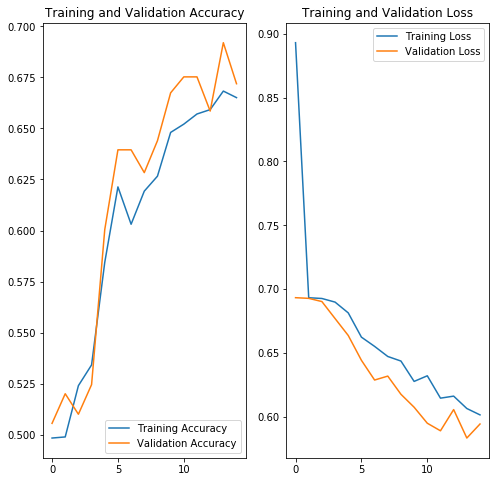

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



## Step 3 - Transfer learning with MobileNet and cats and dogs

In [16]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Split weights
SPLIT_WEIGHTS = (8, 1, 1)
splits = tfds.Split.TRAIN.subsplit(weighted=SPLIT_WEIGHTS)

(raw_train, raw_validation, raw_test), metadata = tfds.load(
    'cats_vs_dogs', split=list(splits),
    with_info=True, as_supervised=True)


### Plot data

<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<_OptionsDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


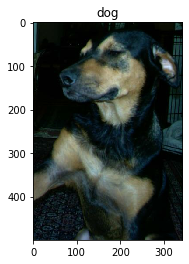

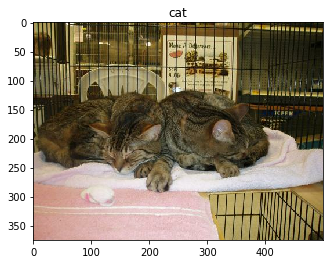

In [17]:
print(raw_train)
print(raw_validation)
print(raw_test)


get_label_name = metadata.features['label'].int2str

for image, label in raw_train.take(2):
  plt.figure()
  plt.imshow(image)
  plt.title(get_label_name(label))


### Define hyperparameters, scale images, and shuffle batches

In [18]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
  image = tf.cast(image, tf.float32)
  image = (image/127.5) - 1
  image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
  return image, label

train = raw_train.map(format_example)
validation = raw_validation.map(format_example)
test = raw_test.map(format_example)

BATCH_SIZE = 64
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)



### Create base model with MobileNetV2 and visualize structure

In [19]:

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

for image_batch, label_batch in train_batches.take(1):
   pass

image_batch.shape
feature_batch = base_model(image_batch)
print(feature_batch.shape)

# Freeze the baze model so we can just use it's generalizations
base_model.trainable = False

# Let's take a look at the base model architecture
base_model.summary()




(64, 5, 5, 1280)
Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 161, 161, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
______________________________________________________________

### Add classification head on top 

In [20]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)


prediction_layer = keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)


model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])



(64, 1280)
(64, 1)


### Complie the model and show a summary

In [21]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

len(model.trainable_variables)



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


2

### Train the model

In [22]:
num_train, num_val, num_test = (
  metadata.splits['train'].num_examples*weight/10
  for weight in SPLIT_WEIGHTS
)

initial_epochs = 10
steps_per_epoch = round(num_train)//BATCH_SIZE
validation_steps = 20

loss0,accuracy0 = model.evaluate(validation_batches, steps = validation_steps)

history = model.fit(train_batches,
                    epochs=initial_epochs,
                    validation_data=validation_batches)




20/20 [==============================] - 1s 63ms/step - loss: 5.4141 - accuracy: 0.4313
Epoch 1/10
291/291 [==============================] - 20s 68ms/step - loss: 2.6955 - accuracy: 0.6597 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
291/291 [==============================] - 16s 55ms/step - loss: 1.4395 - accuracy: 0.8114 - val_loss: 0.6687 - val_accuracy: 0.8987
Epoch 3/10
291/291 [==============================] - 18s 60ms/step - loss: 1.0316 - accuracy: 0.8660 - val_loss: 0.5030 - val_accuracy: 0.9306
Epoch 4/10
291/291 [==============================] - 19s 64ms/step - loss: 0.8129 - accuracy: 0.8870 - val_loss: 0.4357 - val_accuracy: 0.9414
Epoch 5/10
291/291 [==============================] - 19s 64ms/step - loss: 0.7223 - accuracy: 0.9018 - val_loss: 0.4885 - val_accuracy: 0.9405
Epoch 6/10
291/291 [==============================] - 16s 56ms/step - loss: 0.6540 - accuracy: 0.9123 - val_loss: 0.4025 - val_accuracy: 0.9487
Epoch 7/10
291/291 [====================

### Visualize Learning Curves

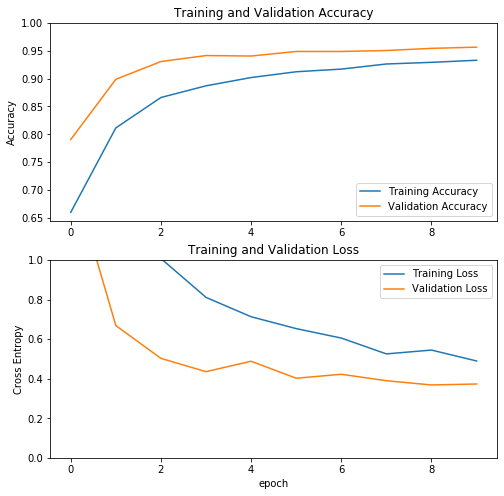

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


### Fine the tune the model 

In [24]:
# Unfreeze the base model 
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False



Number of layers in the base model:  155


### Compile the model and show summary

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_160 (Model) (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,863,873
Non-trainable params: 395,392
_________________________________________________________________


### Continue training the model

In [26]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_batches,
                         epochs=total_epochs,
                         initial_epoch =  history.epoch[-1],
                         validation_data=validation_batches)




Epoch 10/20
291/291 [==============================] - 22s 75ms/step - loss: 0.4145 - accuracy: 0.9424 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 11/20
291/291 [==============================] - 18s 63ms/step - loss: 0.3057 - accuracy: 0.9607 - val_loss: 0.2037 - val_accuracy: 0.9746
Epoch 12/20
291/291 [==============================] - 18s 63ms/step - loss: 0.2805 - accuracy: 0.9652 - val_loss: 0.2210 - val_accuracy: 0.9754
Epoch 13/20
291/291 [==============================] - 18s 63ms/step - loss: 0.2336 - accuracy: 0.9727 - val_loss: 0.2155 - val_accuracy: 0.9746
Epoch 14/20
291/291 [==============================] - 18s 61ms/step - loss: 0.1809 - accuracy: 0.9783 - val_loss: 0.1787 - val_accuracy: 0.9767
Epoch 15/20
291/291 [==============================] - 18s 62ms/step - loss: 0.1547 - accuracy: 0.9807 - val_loss: 0.1798 - val_accuracy: 0.9750
Epoch 16/20
291/291 [==============================] - 18s 61ms/step - loss: 0.1395 - accuracy: 0.9837 - val_loss: 0.1984 

### Look at model's accuracy after fine tuning

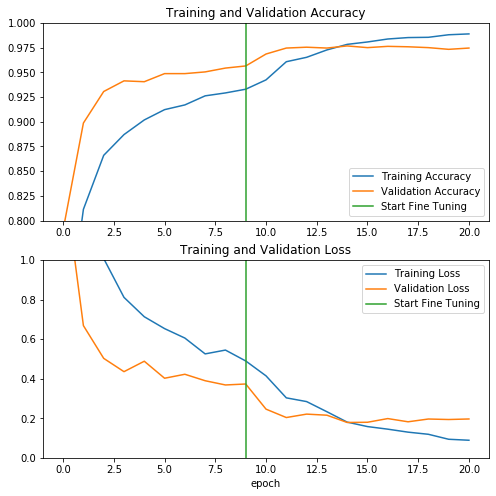

In [27]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()